<a href="https://colab.research.google.com/github/RidhimaSinare/Stock_Price_Prediction_Model/blob/main/stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stock prediction model using NSE dataset of August 2021

* 1.Problem Definition
* 2.Data visualization
* 3.Evaluation
* 4.Features
* 5.Modelling
* 6.Experimentation

In [95]:
!pip install plotly

In [96]:
!pip install chart-studio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.8 MB/s eta 0:00:00


In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import chart_studio.plotly  as py
import plotly.graph_objs as go
from plotly.offline import plot,download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)


#1. Problem Definition:
* Predicting the stock of a particular company's stock from the previous data set available
* A linear regression problem

In [98]:
stock_df=pd.read_csv("/content/drive/MyDrive/stocks_df[1].csv")

#2. Data and its Visualization

* Date: the date the price was recorded
* Stock: name of the company
* Open:Price at which trade of the scrip starts at the beginning of the trade session
* High:Highest price at which the scrip has traded during a trade session.
* Low:Lowest price at which the scrip has traded during a trade session.
* Close:Price at which the scrip has traded at the end of the last trade session.
* Volume: Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a trading day. For instance, a stock's trading volume refers to the number of shares traded between its daily open and close.
* Change pct: price change of a stock over time, expressed as a percentage.

In [99]:
stock_df.head()

,Date,Stock,Open,High,Low,Close,Volume,Change Pct
0,2013-01-02,20MICRONS,80.35,80.55,77.50,77.80,1088880,-3.23
1,2013-01-03,20MICRONS,78.58,79.78,76.00,76.40,590180,-1.80
2,2013-01-04,20MICRONS,76.50,77.25,75.50,75.83,380850,-0.75
3,2013-01-07,20MICRONS,76.88,78.00,74.00,74.90,1144204,-1.23
4,2013-01-08,20MICRONS,74.97,75.97,74.25,75.28,605020,0.51


In [100]:
#stock_df['Stock'].unique().tolist()

In [101]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4094387 entries, 0 to 4094386
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Date        object 
 1   Stock       object 
 2   Open        float64
 3   High        float64
 4   Low         float64
 5   Close       float64
 6   Volume      int64  
 7   Change Pct  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 249.9+ MB


In [102]:
name=str(input("enter name of the stock: "))
name=name.upper()
curr=stock_df.loc[stock_df['Stock'] == name]
curr.isna().sum()
curr

enter name of the stock: tatasteel


,Date,Stock,Open,High,Low,Close,Volume,Change Pct
3626303,1994-11-07,TATASTEEL,167.63,169.76,164.97,168.96,21911,0.31
3626304,1994-11-08,TATASTEEL,169.76,170.29,168.96,169.23,12826,0.16
3626305,1994-11-09,TATASTEEL,169.76,170.29,162.84,163.24,141532,-3.54
3626306,1994-11-10,TATASTEEL,165.24,166.57,159.65,159.92,236035,-2.03
3626307,1994-11-11,TATASTEEL,154.33,154.33,138.36,144.22,216796,-9.82
...,...,...,...,...,...,...,...,...
3633058,2022-01-05,TATASTEEL,1147.00,1180.80,1141.25,1177.60,6186176,2.51
3633059,2022-01-06,TATASTEEL,1172.00,1183.00,1155.55,1163.25,5335400,-1.22
3633060,2022-01-07,TATASTEEL,1165.20,1174.00,1147.85,1160.35,3973857,-0.25
3633061,2022-01-10,TATASTEEL,1165.00,1173.40,1153.85,1169.05,3822500,0.75


In [103]:
curr['Date']=pd.to_datetime(curr['Date'])

In [104]:
curr.shape

(6760, 8)

In [105]:
curr.isnull().sum()

Date          0
Stock         0
Open          0
High          0
Low           0
Close         0
Volume        0
Change Pct    0
dtype: int64

In [106]:
print(f'Dataframe consists data between {curr.Date.min()} {curr.Date.max()}')
print(f'Total number of days: {(curr.Date.max()-curr.Date.min()).days}')

Dataframe consists data between 1994-11-07 00:00:00 2022-01-11 00:00:00
Total number of days: 9927


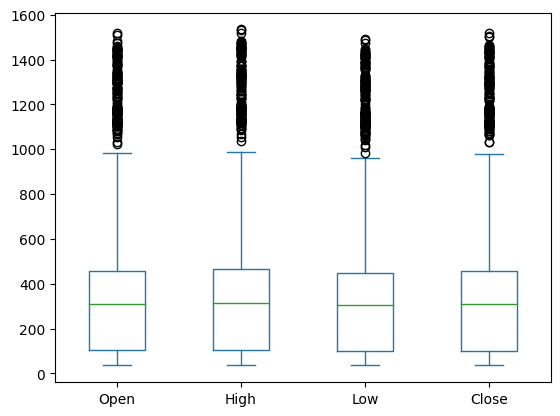

In [107]:
curr[['Open','High','Low','Close']].plot(kind='box');

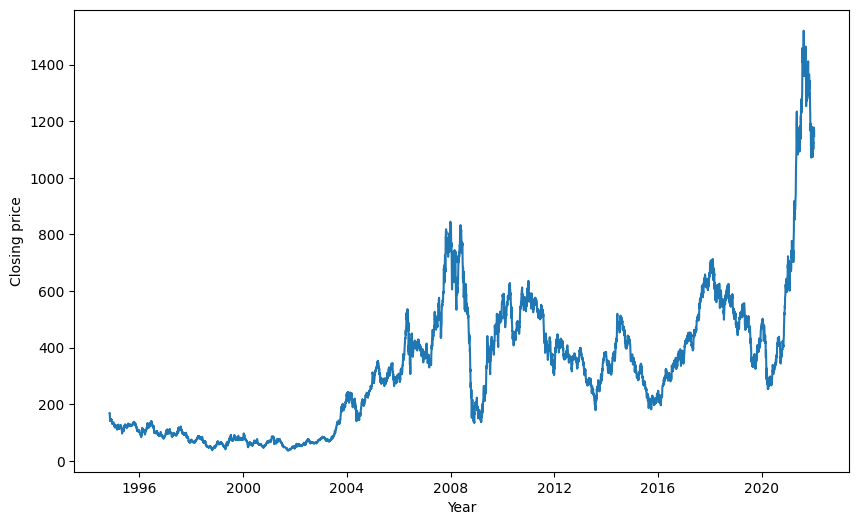

In [108]:
plt.figure(figsize=(10,6))

plt.plot(curr.Date,curr.Close)
plt.xlabel('Year')
plt.ylabel('Closing price');

In [109]:
#setting layout for our plot
layout=go.Layout(
    title='Stock Prices of Tesla',
    xaxis=dict(
        title='Date',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    ),
    yaxis=dict(
        title='Price',
        titlefont=dict(
            family='Courier New, monospace',
            size=18,
            color='#7f7f7f'
        )
    )
)
curr_data=[{'x':curr['Date'],'y':curr['Close']}]
plot=go.Figure(data=curr_data,layout=layout)

In [110]:
#building linear regression model
from sklearn.model_selection import train_test_split

#for preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [111]:
#split data into train and test sets
x=np.array(curr.index).reshape(-1,1)
y=curr['Close']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [112]:
#feauture scaling
scaler=StandardScaler().fit(x_train)

In [113]:
from sklearn.linear_model import LinearRegression

In [114]:
#pip install --upgrade plotly


In [115]:
#creating a linear_model
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

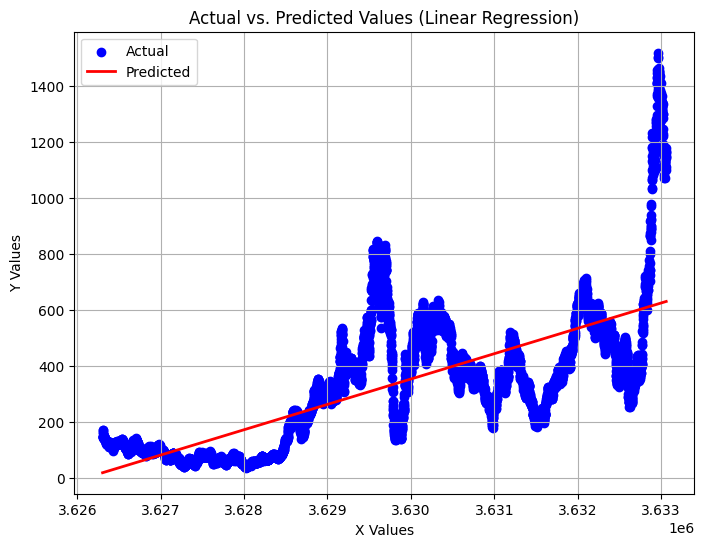

In [116]:
# Predicted values
y_predicted = lm.predict(x)

# Create a scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(x, y, label='Actual', color='blue', marker='o')
plt.plot(x, y_predicted, label='Predicted', color='red', linewidth=2)
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Actual vs. Predicted Values (Linear Regression)')
plt.legend()
plt.grid(True)
plt.show()


In [117]:
#calculating scores for model evaluation
r2train=r2_score(y_train,lm.predict(x_train))
print(r2train)
r2test=r2_score(y_test,lm.predict(x_test))
print(r2test)

0.5119597304057681
0.5203388974797123


In [118]:
msetrain=mse(y_train,lm.predict(x_train))
msetest=mse(y_test,lm.predict(x_test))
print(msetrain,msetest)

29761.312807385573 29083.32154887234


#Now using LSTM

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [120]:
stock=pd.read_csv("/content/drive/MyDrive/stocks_df[1].csv")
stock

,Date,Stock,Open,High,Low,Close,Volume,Change Pct
0,2013-01-02,20MICRONS,80.35,80.55,77.50,77.80,1088880,-3.23
1,2013-01-03,20MICRONS,78.58,79.78,76.00,76.40,590180,-1.80
2,2013-01-04,20MICRONS,76.50,77.25,75.50,75.83,380850,-0.75
3,2013-01-07,20MICRONS,76.88,78.00,74.00,74.90,1144204,-1.23
4,2013-01-08,20MICRONS,74.97,75.97,74.25,75.28,605020,0.51
...,...,...,...,...,...,...,...,...
4094382,2022-01-05,ZYDUSWELL,1868.80,1899.00,1850.40,1891.60,15559,1.50
4094383,2022-01-06,ZYDUSWELL,1891.60,1894.65,1864.80,1869.80,9201,-1.15
4094384,2022-01-07,ZYDUSWELL,1866.00,1879.00,1840.00,1844.65,27888,-1.35
4094385,2022-01-10,ZYDUSWELL,1850.25,1865.00,1840.10,1859.15,11310,0.79


In [121]:
print(stock['Stock'].nunique())
value_count=stock['Stock'].value_counts()

1749


In [122]:
print(stock['Stock'].value_counts().min())

10


In [123]:
stock=stock[stock['Stock'].map(value_count) >= 50]

In [124]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4093825 entries, 0 to 4094386
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Date        object 
 1   Stock       object 
 2   Open        float64
 3   High        float64
 4   Low         float64
 5   Close       float64
 6   Volume      int64  
 7   Change Pct  float64
dtypes: float64(5), int64(1), object(2)
memory usage: 281.1+ MB


In [125]:
name=str(input("enter name of the stock: "))
name=name.upper()
data=stock.loc[stock['Stock'] == name]
data.isna().sum()
data

enter name of the stock: tatasteel


,Date,Stock,Open,High,Low,Close,Volume,Change Pct
3626303,1994-11-07,TATASTEEL,167.63,169.76,164.97,168.96,21911,0.31
3626304,1994-11-08,TATASTEEL,169.76,170.29,168.96,169.23,12826,0.16
3626305,1994-11-09,TATASTEEL,169.76,170.29,162.84,163.24,141532,-3.54
3626306,1994-11-10,TATASTEEL,165.24,166.57,159.65,159.92,236035,-2.03
3626307,1994-11-11,TATASTEEL,154.33,154.33,138.36,144.22,216796,-9.82
...,...,...,...,...,...,...,...,...
3633058,2022-01-05,TATASTEEL,1147.00,1180.80,1141.25,1177.60,6186176,2.51
3633059,2022-01-06,TATASTEEL,1172.00,1183.00,1155.55,1163.25,5335400,-1.22
3633060,2022-01-07,TATASTEEL,1165.20,1174.00,1147.85,1160.35,3973857,-0.25
3633061,2022-01-10,TATASTEEL,1165.00,1173.40,1153.85,1169.05,3822500,0.75


In [126]:
data.head()

,Date,Stock,Open,High,Low,Close,Volume,Change Pct
3626303,1994-11-07,TATASTEEL,167.63,169.76,164.97,168.96,21911,0.31
3626304,1994-11-08,TATASTEEL,169.76,170.29,168.96,169.23,12826,0.16
3626305,1994-11-09,TATASTEEL,169.76,170.29,162.84,163.24,141532,-3.54
3626306,1994-11-10,TATASTEEL,165.24,166.57,159.65,159.92,236035,-2.03
3626307,1994-11-11,TATASTEEL,154.33,154.33,138.36,144.22,216796,-9.82


In [127]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6760 entries, 3626303 to 3633062
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        6760 non-null   object 
 1   Stock       6760 non-null   object 
 2   Open        6760 non-null   float64
 3   High        6760 non-null   float64
 4   Low         6760 non-null   float64
 5   Close       6760 non-null   float64
 6   Volume      6760 non-null   int64  
 7   Change Pct  6760 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 475.3+ KB


In [128]:
data.isnull().sum()

Date          0
Stock         0
Open          0
High          0
Low           0
Close         0
Volume        0
Change Pct    0
dtype: int64

In [129]:
from sklearn.model_selection import train_test_split
data["Close"]=pd.to_numeric(data.Close,errors="coerce")
data=data.dropna()

# Assuming you have your data and labels, X and y
# X_train, X_test, y_train, y_test = train_test_split(data, data["Close"], test_size=0.2, random_state=42)
# trainingset=np.concatenate((X_train,y_train.values.reshape(-1,1)),1)
# testset=np.concatenate((X_test,y_test.values.reshape(-1,1)),1)

#traindata=data.iloc[:,5:6].values
train_size = int(len(data) * 0.8)
trainingset = data.iloc[:train_size]
testset = data.iloc[train_size:]

In [130]:
#X_test=pd.DataFrame(X_test.reshape(-1,1))
testdata

array([[0.36105309],
       [0.34631976],
       [0.35212904],
       ...,
       [1.3899759 ],
       [1.40072925],
       [1.37372227]])

In [131]:
trainingset
trainingset=pd.DataFrame(trainingset)
testset=pd.DataFrame(testset)
# trainingset[['Close']]

In [132]:
trainingset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5408 entries, 3626303 to 3631710
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5408 non-null   object 
 1   Stock       5408 non-null   object 
 2   Open        5408 non-null   float64
 3   High        5408 non-null   float64
 4   Low         5408 non-null   float64
 5   Close       5408 non-null   float64
 6   Volume      5408 non-null   int64  
 7   Change Pct  5408 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 380.2+ KB


In [133]:
traindata

array([[0.16460046],
       [0.16493418],
       [0.15753044],
       ...,
       [0.36373525],
       [0.36172054],
       [0.3663556 ]])

In [134]:
#scaling the training data
sc=MinMaxScaler(feature_range=(0,1))
traindata=sc.fit_transform(trainingset[['Close']])
traindata.shape
traindata.shape[0]

5408

In [135]:
#keeping timestamp value 30 since min value count is 51 after filtering

x_train=[]
y_train=[]

for i in range(60,traindata.shape[0]):
  x_train.append(traindata[i-60:i,0])
  y_train.append(traindata[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [136]:
#adding a new dimension since the sequence input tensor for lstm should be 3D
x_train= np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

#here training set is ready

(5348, 60, 1)

#Model Building

In [137]:
model=Sequential()



In [138]:
#adding first lstm layer followed by dropout to regularize and prevent overfitting
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(rate=0.2))

In [139]:
from keras.src.engine.sequential import input_layer
#adding 3 more lstm layers : 4th will be last so its return seq will be False

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(rate=0.2))

model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(rate=0.2))

model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(rate=0.2))



In [140]:
#adding a final dense layer with dimension of output as 1

model.add(Dense(units=1))

In [141]:
#compiling model using compile() from keras

model.compile(optimizer='adam',loss='mean_squared_error')

In [142]:
#fitting the model

model.fit(x_train,y_train,epochs=20,batch_size=32)

Epoch 1/20
168/168 [==============================] - 31s 125ms/step - loss: 0.0057
Epoch 2/20
168/168 [==============================] - 24s 142ms/step - loss: 0.0025
Epoch 3/20
168/168 [==============================] - 25s 150ms/step - loss: 0.0022
Epoch 4/20
168/168 [==============================] - 22s 129ms/step - loss: 0.0021
Epoch 5/20
168/168 [==============================] - 23s 135ms/step - loss: 0.0017
Epoch 6/20
168/168 [==============================] - 21s 126ms/step - loss: 0.0016
Epoch 7/20
168/168 [==============================] - 23s 136ms/step - loss: 0.0015
Epoch 8/20
168/168 [==============================] - 21s 126ms/step - loss: 0.0014
Epoch 9/20
168/168 [==============================] - 23s 137ms/step - loss: 0.0015
Epoch 10/20
168/168 [==============================] - 21s 125ms/step - loss: 0.0015
Epoch 11/20
168/168 [==============================] - 23s 136ms/step - loss: 0.0012
Epoch 12/20
168/168 [==============================] - 21s 126ms/step - lo

In [143]:
testset

,Date,Stock,Open,High,Low,Close,Volume,Change Pct
3631711,2016-07-27,TATASTEEL,333.19,334.63,319.82,327.90,10872886,-1.29
3631712,2016-07-28,TATASTEEL,323.34,324.43,314.90,315.98,11048914,-3.64
3631713,2016-07-29,TATASTEEL,317.06,324.24,317.06,320.68,8763412,1.49
3631714,2016-08-01,TATASTEEL,321.67,331.11,319.95,329.53,10582495,2.76
3631715,2016-08-02,TATASTEEL,330.97,334.81,325.24,326.82,8510227,-0.82
...,...,...,...,...,...,...,...,...
3633058,2022-01-05,TATASTEEL,1147.00,1180.80,1141.25,1177.60,6186176,2.51
3633059,2022-01-06,TATASTEEL,1172.00,1183.00,1155.55,1163.25,5335400,-1.22
3633060,2022-01-07,TATASTEEL,1165.20,1174.00,1147.85,1160.35,3973857,-0.25
3633061,2022-01-10,TATASTEEL,1165.00,1173.40,1153.85,1169.05,3822500,0.75


In [144]:
#preprocessing test data
testdata=sc.transform(testset[['Close']])

#concat train and test for prediction
# total=np.concatenate((trainingset[5],testset[5]),axis=0)
# total

In [145]:
#inputs = total[len(total)-len(testset)- 30: ]

In [146]:
# inputs=inputs.reshape(-1,1)
# inputs=sc.transform(inputs)

In [147]:
# Initialize an empty list to store x_test
x_test = []

for i in range(60, testdata.shape[0]):
    # Slice the inputs array to create a window of 30 time steps
    window = testdata[i-60:i, 0]

    # Append the window to the x_test list
    x_test.append(window)

# Convert the list to a NumPy array
x_test = np.array(x_test)

# Reshape x_test to match the expected input shape for your model
x_test = np.reshape(x_test, newshape=(x_test.shape[0], x_test.shape[1], 1))


In [148]:
predicted_price=model.predict(x_test)

41/41 [==============================] - 3s 32ms/step


In [149]:
#we have predicted scaled values so we have to reverse the prediction
psp=sc.inverse_transform(predicted_price)
td=sc.inverse_transform(testdata)
#psp

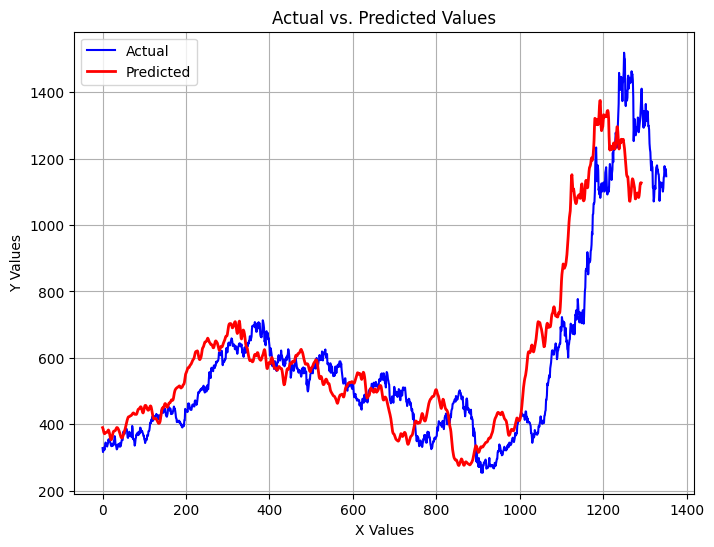

In [150]:
#visualizing predict
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(td, label='Actual', color='blue')
plt.plot( psp, label='Predicted', color='red', linewidth=2)
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid(True)
plt.show()